<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center"> ANÁLISIS SOBRE ARRESTOS</h2>
<h3 align="center">Clasificación jerarquica</h3>


$\;$

---

## Datos sobre arrestos

su conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. en 1973. También se da el porcentaje de la población que vive en áreas urbanas. Un marco de datos con 50 observaciones en 4 variables: 

* Murder numeric Murder arrests (per 100,000)
* Assault numeric Assault arrests (per 100,000)
* UrbanPop numeric Percent urban population
* Rape numeric Rape arrests (per 100,000)


In [1]:
summary(USArrests)
datos <- scale(USArrests) #Escalando los datos

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

Es importante determinar que similitud usar para la construcción de los cluster:

#### Qué Linkage usar?

In [2]:
# Matriz de distancias euclídeas
mat_dist <- dist(x = datos, method = "euclidean")

# Dendrogramas con linkage complete y average
hc_euclidea_complete <- hclust(d = mat_dist, method = "complete")
hc_euclidea_average  <- hclust(d = mat_dist, method = "average")
hc_euclidea_single   <- hclust(d = mat_dist, method = "single")

Se usa el Linkage que tenga más coeficiente de correlación de entre las distancias:

In [3]:
cor(x = mat_dist, cophenetic(hc_euclidea_complete))     #coeficiente de correlación entre las distancias (cophenetic) del dendrograma
cor(x = mat_dist, cophenetic(hc_euclidea_average))
cor(x = mat_dist, cophenetic(hc_euclidea_single))

[1] 0.6979437

[1] 0.7180382

[1] 0.541272

Según los resultados anteriores, el *linkage average* consigue representar ligeramente mejor la similitud entre observaciones. 

## Dendrogramas


### Dendrograma con Lincage completo

Warning message in get_col(col, k):
"Length of color vector was longer than the number of clusters - first k elements are used"

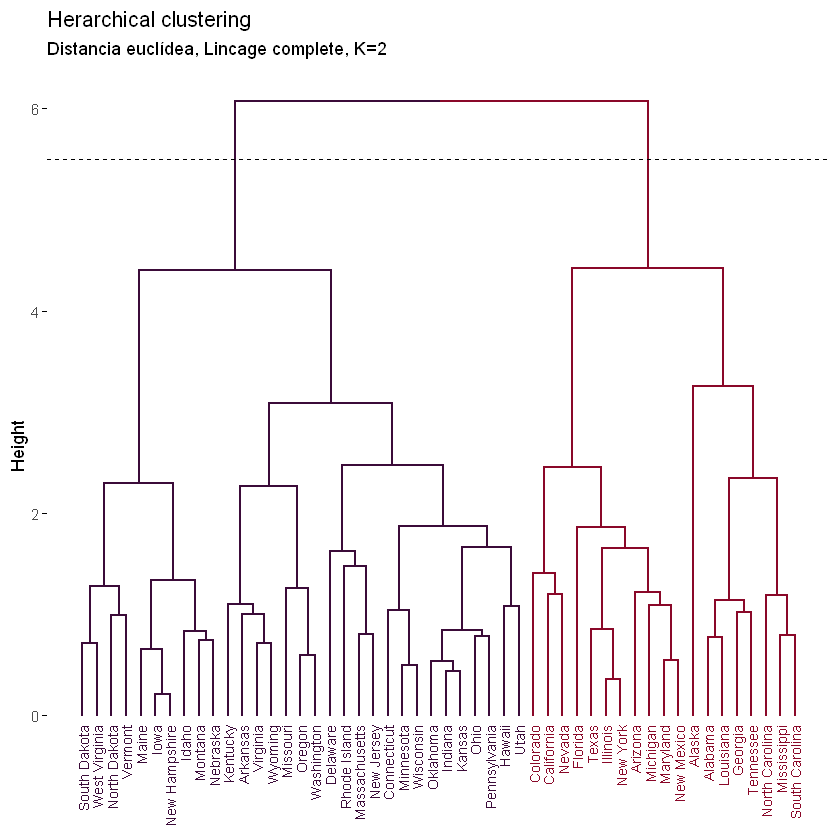

In [5]:
library(factoextra)
datos <- USArrests
datos <- scale(datos)
set.seed(101)

hc_euclidea_completo <- hclust(d = dist(x = datos, method = "euclidean"),
                               method = "complete")

fviz_dend(x = hc_euclidea_completo, k = 2, cex = 0.6,k_colors = c("#3B0B39",  "#8A0829", "#F1090C", "#FA4002", "#F4A405","#FFFF00")) +
  geom_hline(yintercept = 5.5, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Lincage complete, K=2")


### Dendrograma con Lincage average

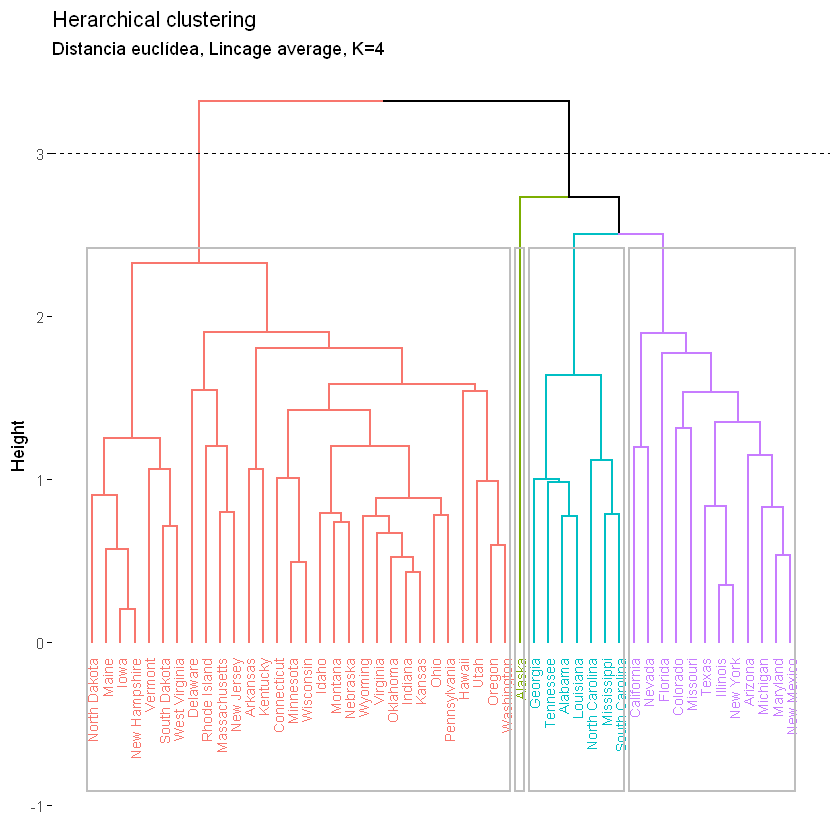

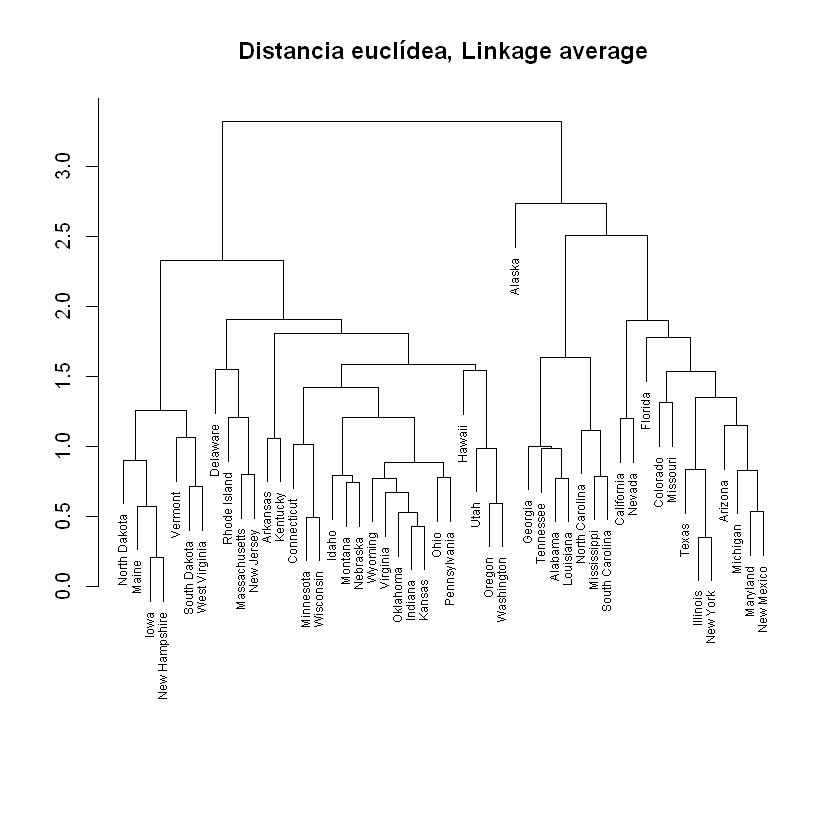

In [6]:
hc_euclidea_average<- hclust(d = dist(x = datos, method = "euclidean"),
                             method = "average")
fviz_dend(x = hc_euclidea_average, k = 4, cex = 0.6, rect = TRUE, rect_lty = 1) +
  geom_hline(yintercept = 3, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Lincage average, K=4")

plot(x = hc_euclidea_average, cex = 0.6, xlab = "", ylab = "", sub = "",
     main = "Distancia euclídea, Linkage average")

### Dendrograma con Lincage single

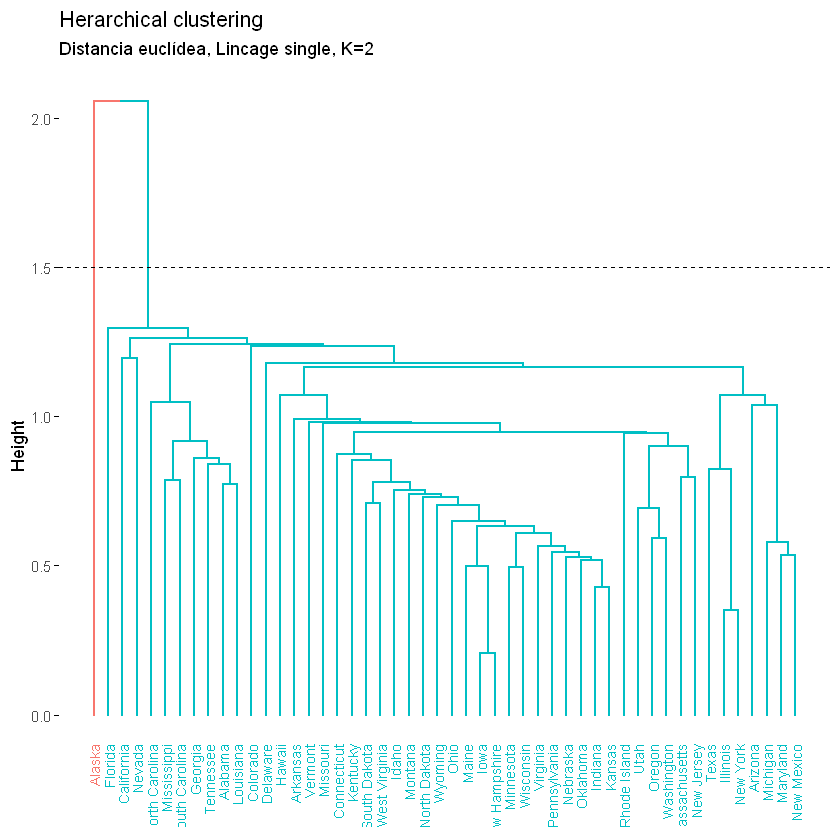

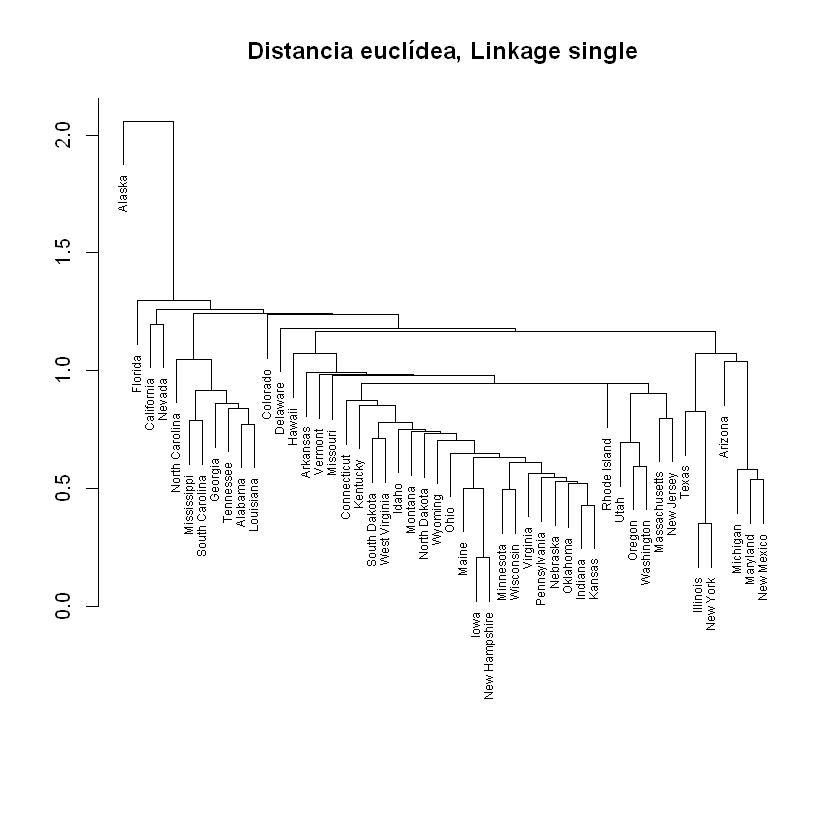

In [7]:
hc_euclidea_single<- hclust(d = dist(x = datos, method = "euclidean"),
                            method = "single")
fviz_dend(x = hc_euclidea_single, k = 2, cex = 0.6) +
  geom_hline(yintercept = 1.5, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Lincage single, K=2")

plot(x = hc_euclidea_single, cex = 0.6, xlab = "", ylab = "", sub = "",
     main = "Distancia euclídea, Linkage single")


## Cluster visto como un PCA

Antes de usar cluster es posible usar una forma menos frecuente de representar los resultados de un hierarchical clustering es combinándolos con una reducción de dimensionalidad por PCA. Primero, se calculan las componentes principales y se representan las observaciones en un scatterplot empleando las dos primeras componentes, finalmente se colorean los clusters mediante elipses.


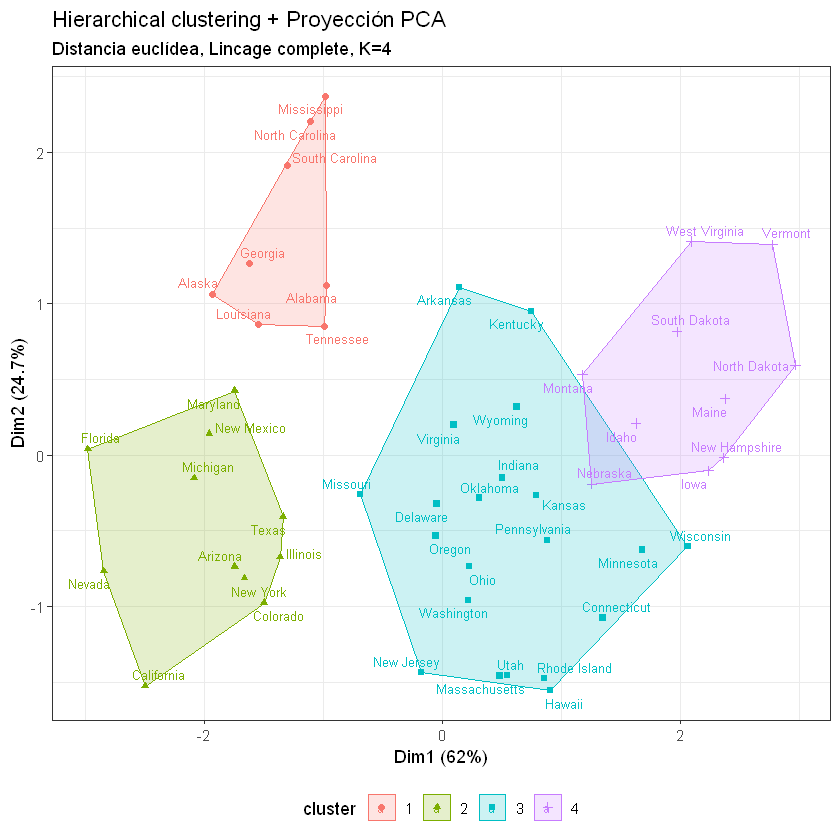

In [8]:
library(factoextra)
fviz_cluster(object = list(data=datos, cluster=cutree(hc_euclidea_completo, k=4)),
             ellipse.type = "convex", repel = TRUE, show.clust.cent = FALSE,
             labelsize = 8)  +
  labs(title = "Hierarchical clustering + Proyección PCA",
       subtitle = "Distancia euclídea, Lincage complete, K=4") +
  theme_bw() +
  theme(legend.position = "bottom")

### ¿Cómo hacer el corte del dendograma?

Una vez creado el dendrograma, se tiene que decidir a qué altura se corta para generar los clusters. La función cutree() recibe como input un dendrograma y devuelve el cluster al que se ha asignado cada observación dependiendo del número de clusters especificado (argumento k) o la altura de corte indicada (argumento h).

In [9]:
cutree(hc_euclidea_completo, k = 4)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              4              2              3              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              4              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             4              4              2              4              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              4              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             4              1              2              3              4 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              4              3              3

In [10]:
cutree(hc_euclidea_completo, h = 6)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             2              2              1              2              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              2              2 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              2              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             2              1              1              2              2 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              2              2              2

Una forma gráfica es usar un algoritmo iterativo el cual calcula la suma de cuadrados dentro de los grupos la funcion 

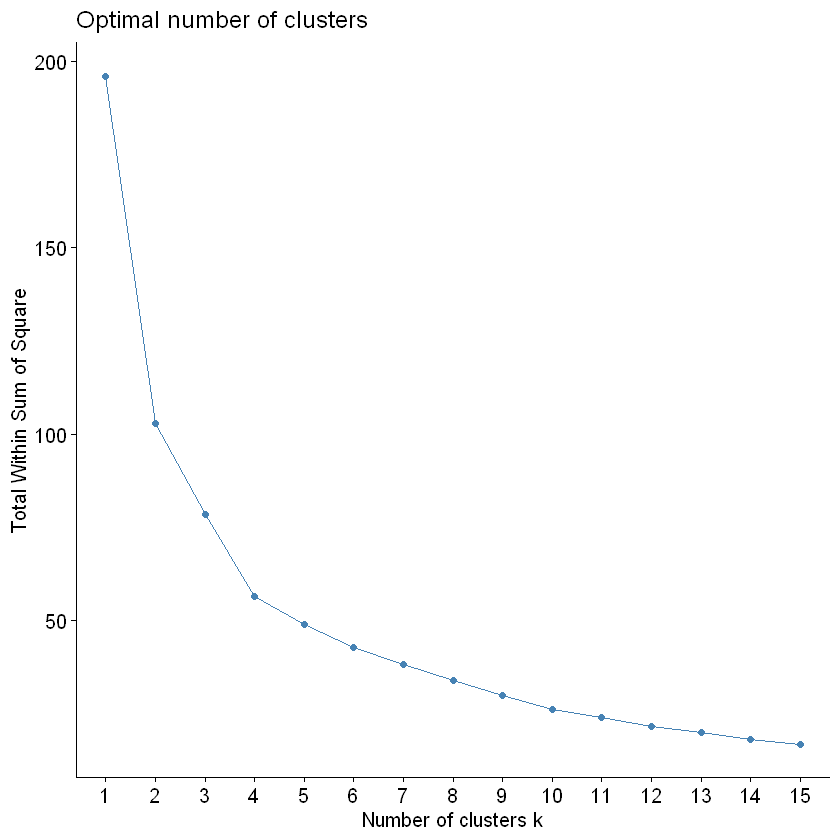

In [11]:
library(factoextra)
fviz_nbclust(x = datos, FUNcluster = kmeans, method = "wss", k.max = 15, 
             diss = get_dist(datos, method = "euclidean"), nstart = 50)

Dada la gráfica anterior, se puede identificar que 4 es un buen número puesto que comienza a estabilizarse la suma de cuadrados en ese punto